### DATA INITIALIZATION

In [2]:
data.full <- read.csv("P3_data.csv", header = T)

### DATA CLEANING

In [3]:
#remove <= 100
data.full <- data.full[!(data.full$GrossAmount > 0 & data.full$GrossAmount <= 100), ]

#remove unknown products
data.full <- data.full[!(data.full$Productid == "unknown"), ]
data.full <- data.full[!is.element(data.full$Productid, names(sort(table(data.full$Productid), decreasing = T)[25:length(unique(data.full$Productid))])), ]

#fix dates
data.full$date.fix <- as.Date(data.full$EntryDate)

#Clean funnel
data.full$everset <- ifelse(data.full$everissued == 1 |
                              data.full$evernetissued == 1 |
                              data.full$eversat == 1 |
                              data.full$GrossAmount > 0, 1, 0)

data.full$everissued <- ifelse(data.full$evernetissued == 1 |
                              data.full$eversat == 1 |
                              data.full$GrossAmount > 0, 1, 0)

data.full$evernetissued <- ifelse(data.full$eversat == 1 |
                              data.full$GrossAmount > 0, 1, 0)


#Sale
data.full$sale <- ifelse(data.full$NetAmount > 0, 1, 0)

#Rescinded
data.full$rescinded <- ifelse(data.full$GrossAmount > 0 & data.full$NetAmount == 0, 1, 0)

#ChangeOrder
data.full$changeorder <- ifelse(data.full$GrossAmount > 0 & data.full$NetAmount > 0 & data.full$GrossAmount != data.full$NetAmount, 1, 0)

#Signed
data.full$signed <- ifelse(data.full$GrossAmount > 0, 1, 0)


#Product Category
data.full$Product.category <- NA

data.full[data.full$Productid == "hottub" |
            data.full$Productid == "kitchen" |
            data.full$Productid == "door" |
            data.full$Productid == "sunroom" |
            data.full$Productid == "basement" |
            data.full$Productid == "solar" |
            data.full$Productid == "screenroom" |
            data.full$Productid == "generator" |
            data.full$Productid == "patiodoor" |
            data.full$Productid == "cool" |
            data.full$Productid == "deck" |
            data.full$Productid == "patiocover", "Product.category"] <- "Luxury"

data.full[data.full$Productid == "win" |
            data.full$Productid == "bath" |
            data.full$Productid == "siding" |
            data.full$Productid == "gtrpro" |
            data.full$Productid == "gutters" |
            data.full$Productid == "bsmtwaterproof" |
            data.full$Productid == "water", "Product.category"] <- "Not Urgent"

data.full[data.full$Productid == "roof" |
            data.full$Productid == "walkintub" |
            data.full$Productid == "shower" |
            data.full$Productid == "longevity" |
            data.full$Productid == "tub", "Product.category"] <- "Urgent"

### DATA EXPLORATION

In [3]:
min(data.full$date.fix) #Start Date
max(data.full$date.fix) #End Date

[1] "2020-02-15"

[1] "2020-09-30"

In [4]:
nrow(data.full) #Number of records

[1] 2210476

In [5]:
nrow(data.full[data.full$sale ==1, ])/nrow(data.full) #Percent of sales

[1] 0.05567127

In [14]:
sort(table(data.full$Productid), decreasing = T)[1:24]/sum(table(data.full$Productid)) #Product types


          roof            win      walkintub           bath         hottub 
   0.259098493    0.251533606    0.138711300    0.102190207    0.046273291 
           tub         shower          water         siding           door 
   0.032852200    0.029628460    0.029159783    0.025643346    0.012345757 
       kitchen        sunroom          solar       basement        gutters 
   0.011930010    0.011735934    0.008209092    0.006623008    0.005886515 
    patiocover bsmtwaterproof     screenroom         gtrpro           cool 
   0.004818872    0.004262430    0.003791491    0.003474365    0.003164024 
     patiodoor      generator           deck      longevity 
   0.003051379    0.002054309    0.001952068    0.001610060 

In [7]:
sort(table(data.full$Product.category), decreasing = T)/sum(table(data.full$Product.category)) #Product categories


    Urgent Not Urgent     Luxury 
 0.4619005  0.4221503  0.1159492 

In [16]:
sort(table(data.full$state), decreasing = T)/sum(table(data.full$state)) #States


          TX           OH           FL           CA           PA           MI 
8.120559e-02 7.137015e-02 7.085714e-02 6.866711e-02 5.058865e-02 5.057146e-02 
          TN           NY           VA           NC           IL           WI 
4.986347e-02 4.579783e-02 3.109873e-02 3.104897e-02 3.018038e-02 3.004240e-02 
          MO           GA           IN           CO           WA           MD 
2.711859e-02 2.577318e-02 2.390616e-02 2.277699e-02 2.271909e-02 2.224724e-02 
          MN           AZ           MA           KY           OK           NJ 
2.128365e-02 2.120765e-02 1.893936e-02 1.714201e-02 1.368619e-02 1.322747e-02 
          OR           KS           NM           SC           CT           LA 
1.260633e-02 1.246202e-02 1.142469e-02 1.069498e-02 1.062486e-02 9.866653e-03 
          AL           NV           IA           ID           AR           MS 
9.208876e-03 8.978609e-03 7.980182e-03 6.784059e-03 6.357002e-03 5.122879e-03 
          WV           DE           RI           UT

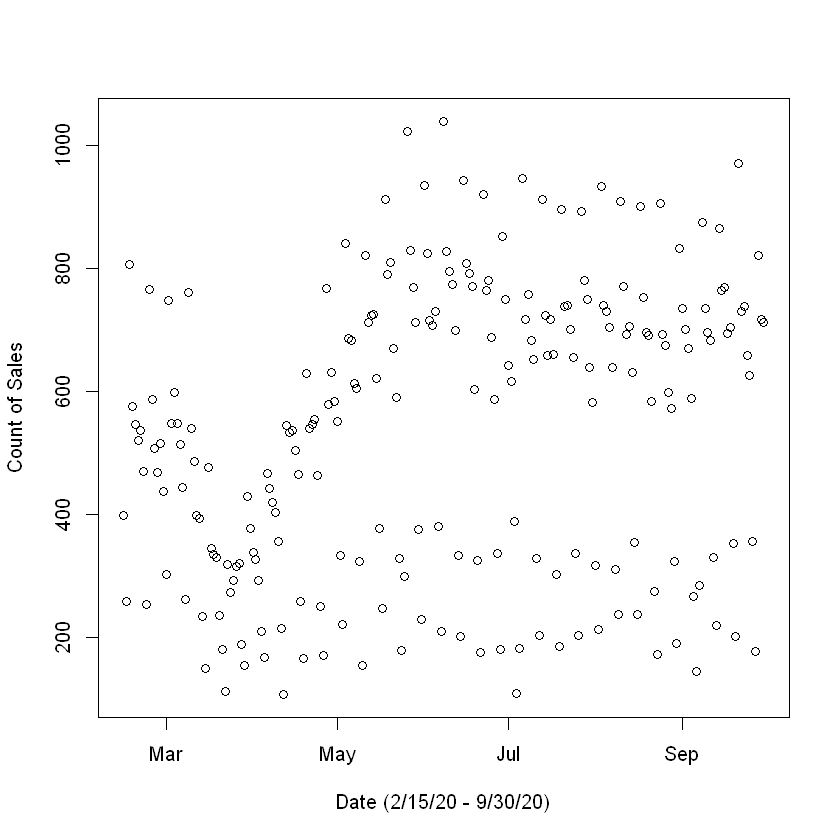

In [17]:
#Number of sales everday in dataset
dates <- sort(unique(data.full$date.fix), decreasing = F)

sale.date <- vector()
for (i in 1:length(dates)){
  sale.date <- c(sale.date, sum(data.full[data.full$date.fix == dates[i], "sale"]))
}

plot(dates, sale.date, xlab = "Date (2/15/20 - 9/30/20)", ylab = "Count of Sales")

In [23]:
#Data at each funnel level
data.funnel <- data.frame(level = rep(NA, 8), count = rep(NA, 8), percent = rep(NA, 8), luxury = rep(NA, 8), urgent = rep(NA, 8), noturgent = rep(NA, 8))

funnel.cols <- c(12, 13, 14, 15, 32, 30, 29, 31) #names(data.full[, c(12, 13, 14, 15, 32, 30, 29, 31)])
j <- 1

for (i in funnel.cols){
  
  
  data.funnel$level[j] <- names(data.full)[i]
  data.funnel$count[j] <- nrow(data.full[data.full[,i] == 1, ])
  data.funnel$percent[j] <- nrow(data.full[data.full[,i] == 1, ])/nrow(data.full)*100
  data.funnel$luxury[j] <- nrow(data.full[data.full[,i] == 1 & data.full$Product.category == "Luxury", ])/nrow(data.full[data.full[,i] == 1, ])*100
  data.funnel$urgent[j] <- nrow(data.full[data.full[,i] == 1 & data.full$Product.category == "Urgent", ])/nrow(data.full[data.full[,i] == 1, ])*100
  data.funnel$noturgent[j] <- nrow(data.full[data.full[,i] == 1 & data.full$Product.category == "Not Urgent", ])/nrow(data.full[data.full[,i] == 1, ])*100

  j <- j + 1
}

data.funnel
#write.table(data.funnel, "clipboard", sep = "\t")

level,count,percent,luxury,urgent,noturgent
everset,591317,26.750663658,14.731692,34.81990,50.44841
everissued,589943,26.688505100,14.604631,34.86083,50.53454
evernetissued,425087,19.230563915,13.426898,33.91518,52.65793
eversat,423795,19.172114965,13.434562,33.94684,52.61860
signed,155343,7.027581390,11.968354,35.20146,52.83019
rescinded,32283,1.460454671,9.639748,40.05514,50.30511
sale,123060,5.567126718,12.579230,33.92817,53.49261
changeorder,180,0.008143042,2.777778,70.55556,26.66667


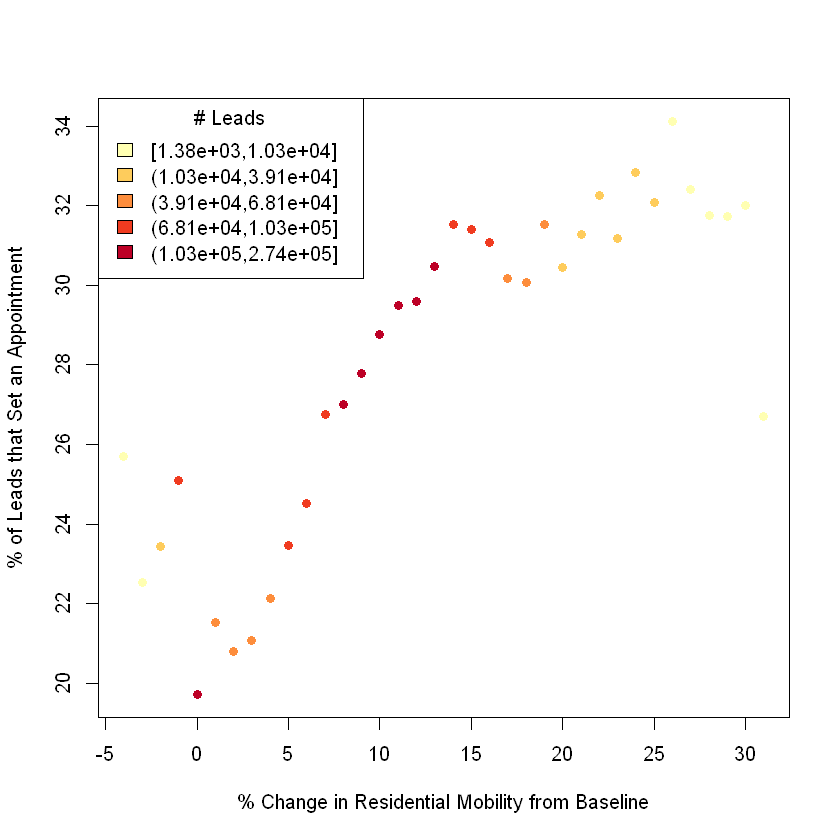

In [24]:
#Set appointmnet by mobility
set.vec <- vector()
n.set.vec <- vector()
mob.values <- sort(unique(data.full$residential), decreasing = F)[table(data.full$residential)>1000]
for (i in mob.values){
  data.temp <- data.full[data.full$residential == i, ]
  set.vec <- c(set.vec, mean(data.temp$everset))
  n.set.vec <- c(n.set.vec, nrow(data.temp))
} 


library(RColorBrewer)
percs <- c(0, 0.2, 0.4, 0.6, 0.8, 1)
breaks <- quantile(n.set.vec, percs)
cols <- brewer.pal(length(percs) - 1, "YlOrRd")

col_cat <- cut(n.set.vec,
               breaks = breaks,
               include.lowest = TRUE)


plot(mob.values, set.vec*100, col = cols[col_cat], pch = 16, 
     xlab = "% Change in Residential Mobility from Baseline", ylab = "% of Leads that Set an Appointment")#, main = "% of Leads w/ Appointment by % Change in Residential Mobility")
legend("topleft", legend=levels(col_cat), fill=cols, title = "# Leads")

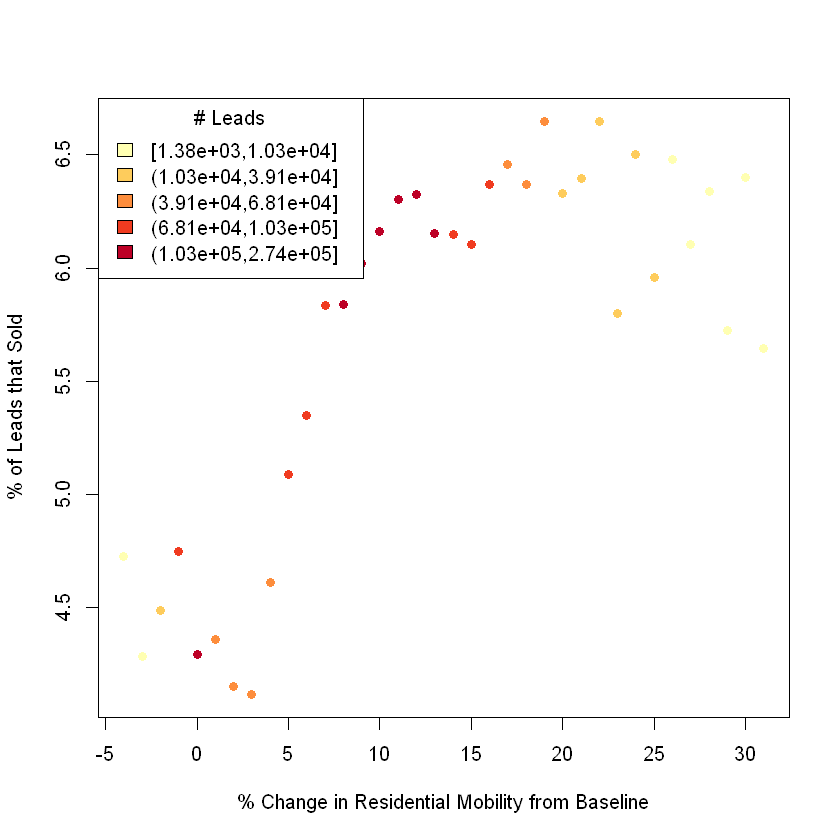

In [25]:
#Sales by mobility
sale.vec <- vector()
n.vec <- vector()
mob.values <- sort(unique(data.full$residential), decreasing = F)[table(data.full$residential)>1000]
for (i in mob.values){
  data.temp <- data.full[data.full$residential == i, ]
  sale.vec <- c(sale.vec, mean(data.temp$sale))
  n.vec <- c(n.vec, nrow(data.temp))
} 

library(RColorBrewer)
percs <- c(0, 0.2, 0.4, 0.6, 0.8, 1)
breaks <- quantile(n.vec, percs)
cols <- brewer.pal(length(percs) - 1, "YlOrRd")

col_cat <- cut(n.vec,
               breaks = breaks,
               include.lowest = TRUE)


plot(mob.values, sale.vec*100, col = cols[col_cat], pch = 16,
     xlab = "% Change in Residential Mobility from Baseline", ylab = "% of Leads that Sold")#, main = "% of Leads that Sold by % Change in Residential Mobility")
legend("topleft", legend=levels(col_cat), fill=cols, title = "# Leads")

In [11]:
#Correlation of each measure of mobility
cor(data.full$residential, data.full$grocery)
cor(data.full$residential, data.full$parks)
cor(data.full$residential, data.full$retail)
cor(data.full$residential, data.full$transit)
cor(data.full$residential, data.full$workplace)

[1] -0.5049132

[1] -0.04986955

[1] -0.7178819

[1] -0.6679133

[1] -0.8672119

### MODEL BUILDING

In [29]:
mp.0 <- glm(sale ~ 1, data = data.full, family=binomial)
#summary(mp.0)

In [30]:
mp.1 <- glm(sale ~ residential, data = data.full, family=binomial)
anova(mp.0, mp.1, test="Chisq")
#summary(mp.1)

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
2210475,950004.5,NA,NA,NA
2210474,947868.4,1,2136.122,0


In [31]:
mp.2 <- glm(sale ~ residential + Product.category, data = data.full, family=binomial)
anova(mp.1, mp.2, test="Chisq")
#summary(mp.2)

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
2210474,947868.4,NA,NA,NA
2210472,940065.3,2,7803.068,0


In [39]:
mp.3 <- glm(sale ~ residential*Product.category, data = data.full, family=binomial)

anova(mp.2, mp.3, test="Chisq")
#summary(mp.3)

In [ ]:
mp.4 <- glm(sale ~ (workplace + retail + transit + parks + grocery + residential)*Product.category, data = data.full[!is.na(data.full$Product.category),], family=binomial)
anova(mp.3, mp.4, test="Chisq")
#summary(mp.4)

### FINAL MODELS

In [4]:
m.everset <- glm(everset ~ residential*Product.category, data = data.full, family=binomial)
m.everissued <- glm(everissued ~ residential*Product.category, data = data.full, family=binomial)
m.evernetissued <- glm(evernetissued ~ residential*Product.category, data = data.full, family=binomial)
m.eversat <- glm(eversat ~ residential*Product.category, data = data.full, family=binomial)
m.signed <- glm(signed ~ residential*Product.category, data = data.full, family=binomial)
m.rescinded <- glm(rescinded ~ residential*Product.category, data = data.full, family=binomial)
m.sale <- glm(sale ~ residential*Product.category, data = data.full, family=binomial)
m.changeorder <- glm(changeorder ~ residential*Product.category, data = data.full, family=binomial)

In [54]:
#All slopes from summary
coef.df <- data.frame(rbind(summary(m.everset)$coefficients[c(2, 5, 6), ],
                            summary(m.everissued)$coefficients[c(2, 5, 6), ],
                            summary(m.evernetissued)$coefficients[c(2, 5, 6), ],
                            summary(m.eversat)$coefficients[c(2, 5, 6), ],
                            summary(m.signed)$coefficients[c(2, 5, 6), ],
                            summary(m.rescinded)$coefficients[c(2, 5, 6), ],
                            summary(m.sale)$coefficients[c(2, 5, 6), ],
                            summary(m.changeorder)$coefficients[c(2, 5, 6), ]))
coef.df
#write.table(coef.df, "clipboard", sep = "\t")

,Estimate,Std..Error,z.value,Pr...z..
residential,0.037096155,0.0005989517,61.9351398,0.000000e+00
residential.Product.categoryNot.Urgent,-0.014467029,0.0006776051,-21.3502359,3.879757e-101
residential.Product.categoryUrgent,-0.017016805,0.0006905460,-24.6425362,4.424693e-134
residential.1,0.036738218,0.0006002107,61.2088649,0.000000e+00
residential.Product.categoryNot.Urgent.1,-0.014119749,0.0006787409,-20.8028545,4.078023e-96
residential.Product.categoryUrgent.1,-0.016603994,0.0006917044,-24.0044643,2.497758e-127
residential.2,0.027085033,0.0006723625,40.2833805,0.000000e+00
residential.Product.categoryNot.Urgent.2,-0.006454162,0.0007556392,-8.5413281,1.326879e-17
residential.Product.categoryUrgent.2,-0.007343696,0.0007793827,-9.4224513,4.406776e-21
residential.3,0.027030761,0.0006729226,40.1691952,0.000000e+00


### MODEL VALIDATION

0.07777759,0.1358173
0.19962366,0.2161489
0.25590193,0.2972533
0.32140011,0.3377913
0.49864456,0.5171859


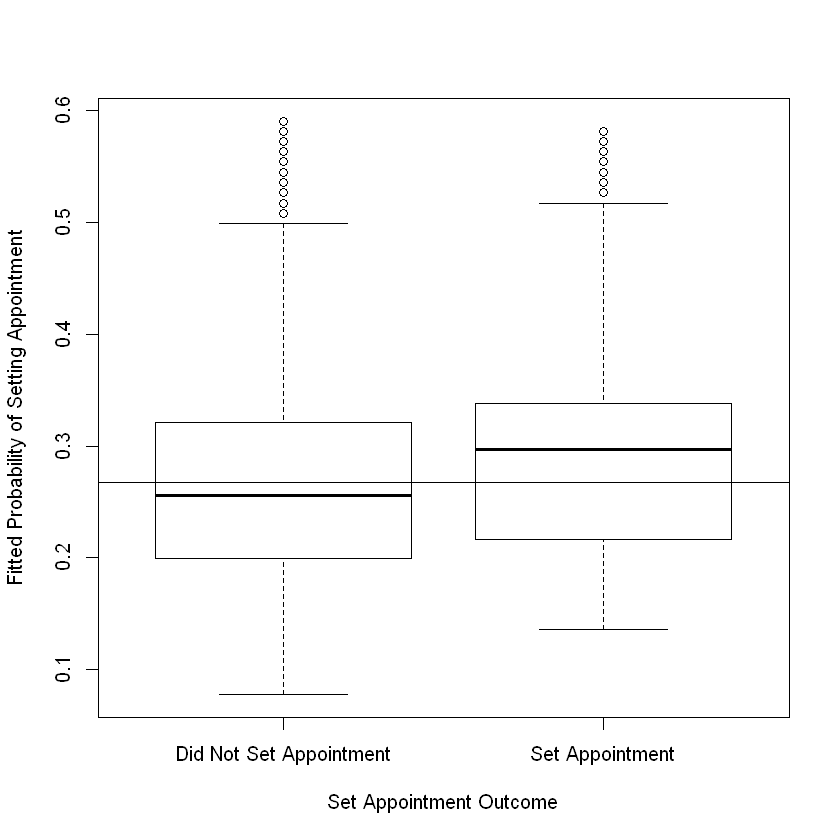

In [44]:
bp.everset <- boxplot(m.everset$fitted.values ~ everset, data = data.full,
                      xlab = "Set Appointment Outcome", ylab = "Fitted Probability of Setting Appointment", names = c("Did Not Set Appointment", "Set Appointment"))
abline(h = mean(data.full$everset))
bp.everset$stats

0.07745817,0.1354937
0.19938437,0.2159416
0.25578382,0.2970726
0.31793175,0.3361878
0.49286833,0.5112351


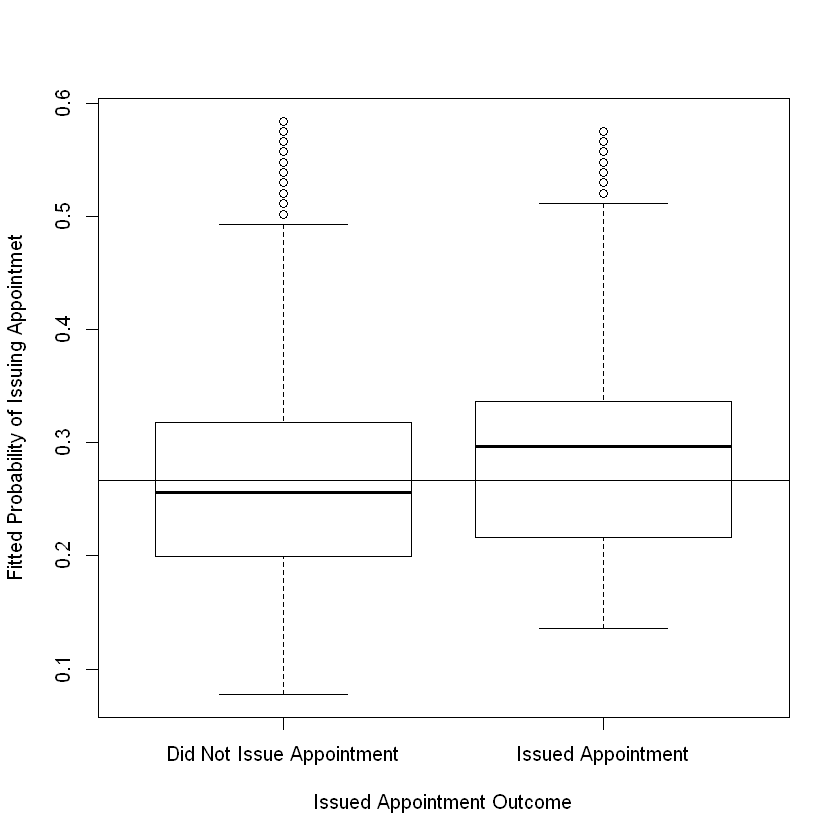

In [45]:
bp.everissued <- boxplot(m.everissued$fitted.values ~ everissued, data = data.full,
                         xlab = "Issued Appointment Outcome", ylab = "Fitted Probability of Issuing Appointmet", names = c("Did Not Issue Appointment", "Issued Appointment"))
abline(h = mean(data.full$everissued))
bp.everissued$stats

0.05290105,0.0933840
0.13956013,0.1543999
0.18199004,0.2190520
0.23542960,0.2485889
0.37735824,0.3710158


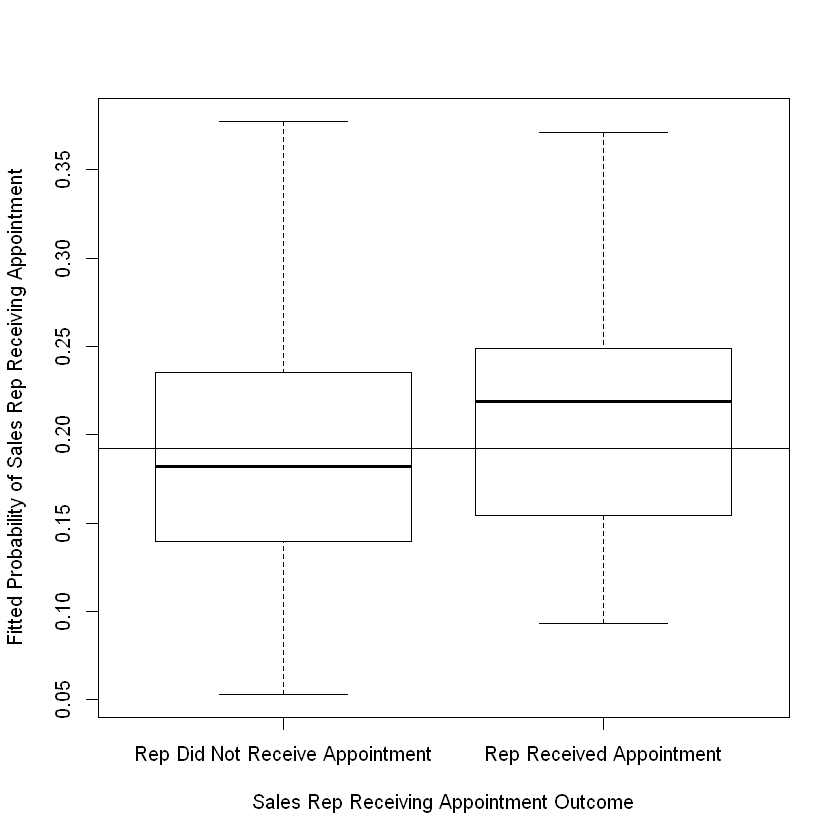

In [46]:
bp.evernetissued <- boxplot(m.evernetissued$fitted.values ~ evernetissued, data = data.full,
                            xlab = "Sales Rep Receiving Appointment Outcome", ylab = "Fitted Probability of Sales Rep Receiving Appointment",
                            names = c("Rep Did Not Receive Appointment", "Rep Received Appointment"))
abline(h = mean(data.full$evernetissued))
bp.evernetissued$stats

0.05308173,0.09339969
0.13927836,0.15400744
0.18159218,0.21836842
0.23483143,0.24759197
0.37625859,0.36993633


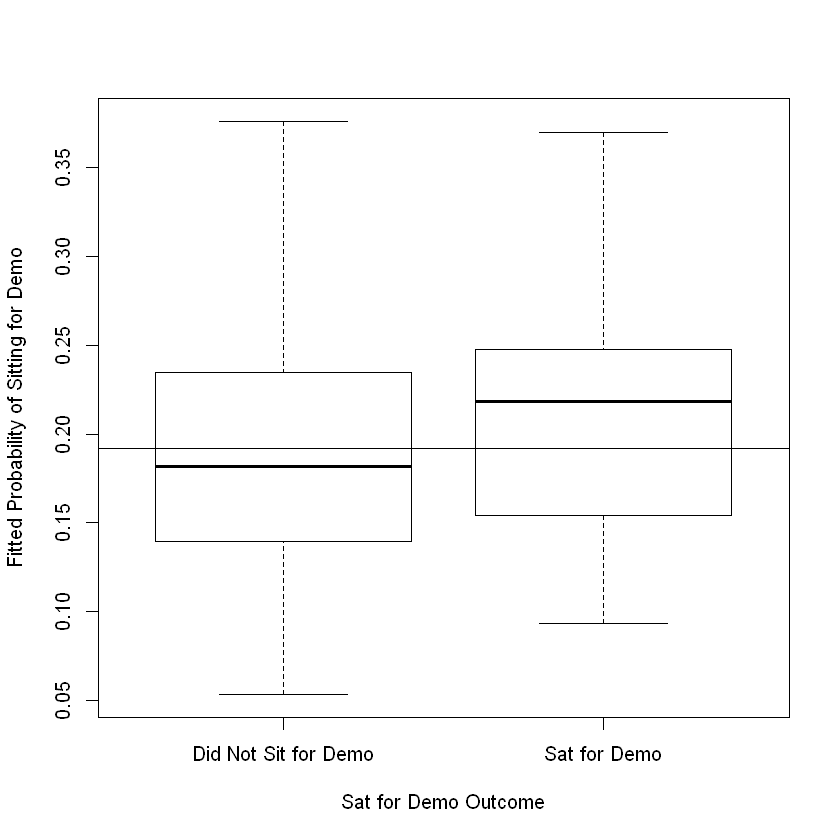

In [47]:
bp.eversat <- boxplot(m.eversat$fitted.values ~ eversat, data = data.full,
                      xlab = "Sat for Demo Outcome", ylab = "Fitted Probability of Sitting for Demo", names = c("Did Not Sit for Demo", "Sat for Demo"))
abline(h = mean(data.full$eversat))                      
bp.eversat$stats

0.02636482,0.04002781
0.05380599,0.05662019
0.06703291,0.07741950
0.08597627,0.08940036
0.12611883,0.12611883


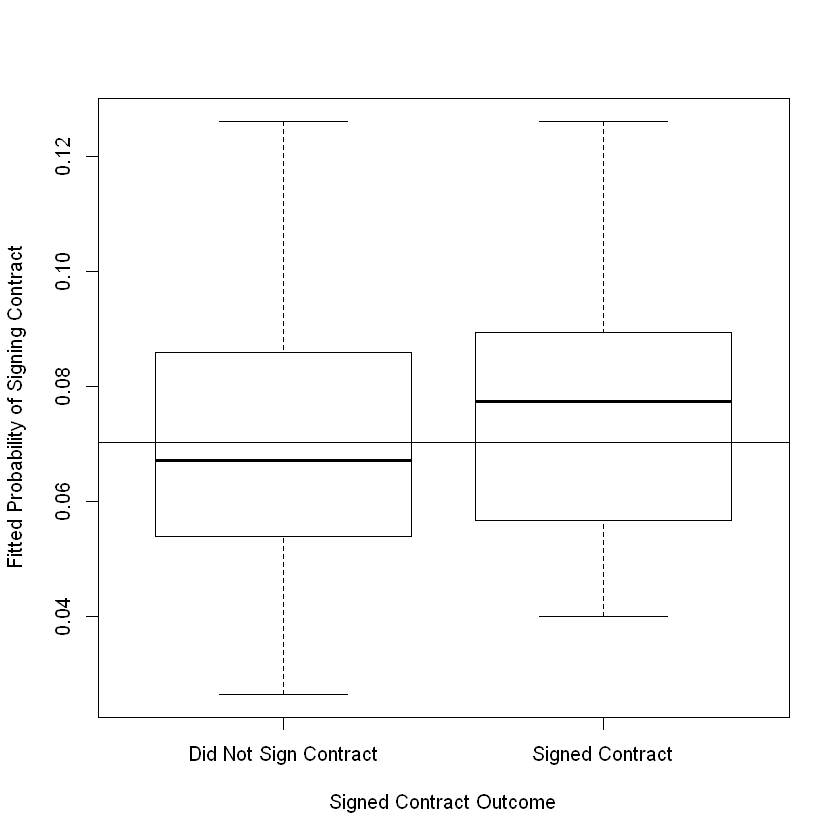

In [48]:
bp.signed <- boxplot(m.signed$fitted.values ~ signed, data = data.full,
                     xlab = "Signed Contract Outcome", ylab = "Fitted Probability of Signing Contract", names = c("Did Not Sign Contract", "Signed Contract"))
abline(h = mean(data.full$signed))
bp.signed$stats

0.005682051,0.009200267
0.012454559,0.012622531
0.013406495,0.016597963
0.017293179,0.017435618
0.020558682,0.019395496


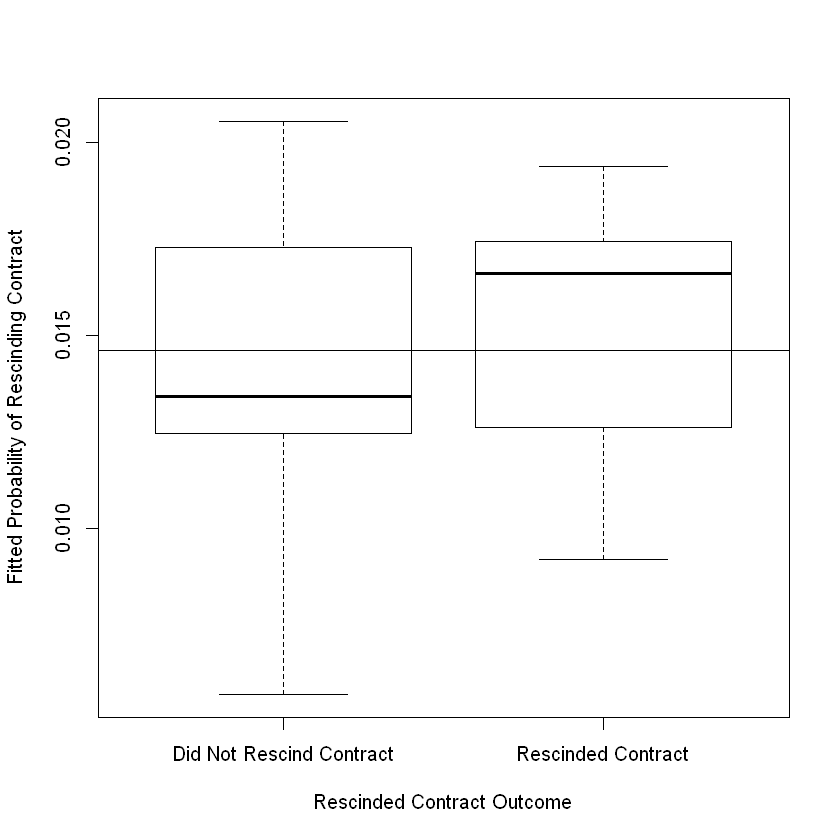

In [49]:
bp.rescinded <- boxplot(m.rescinded$fitted.values ~ rescinded, data = data.full,
                        xlab = "Rescinded Contract Outcome", ylab = "Fitted Probability of Rescinding Contract", names = c("Did Not Rescind Contract", "Rescinded Contract"))
abline(h = mean(data.full$rescinded))
bp.rescinded$stat

0.01818890,0.02928804
0.04107987,0.04354985
0.05571324,0.06262953
0.06864200,0.07184499
0.10743371,0.10743371


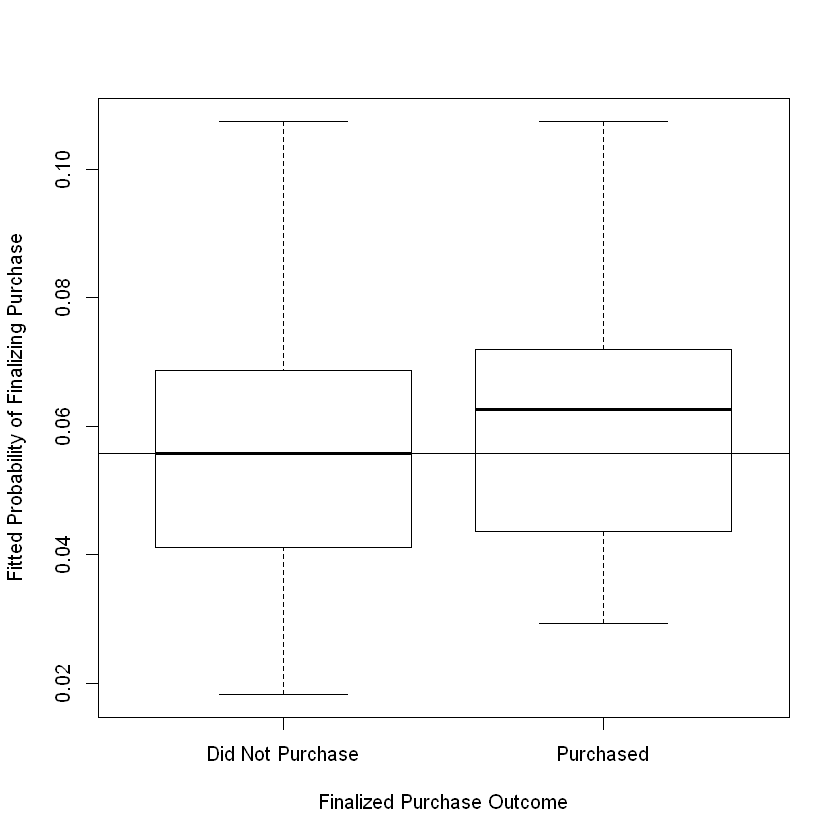

In [50]:
bp.sale <- boxplot(m.sale$fitted.values ~ sale, data = data.full,
                   xlab = "Finalized Purchase Outcome", ylab = "Fitted Probability of Finalizing Purchase", names = c("Did Not Purchase", "Purchased"))
abline(h = mean(data.full$sale))
bp.sale$stats

9.831201e-06,1.832127e-05
4.739557e-05,6.136467e-05
6.199854e-05,1.227428e-04
1.236980e-04,1.253877e-04
1.394908e-04,1.321232e-04


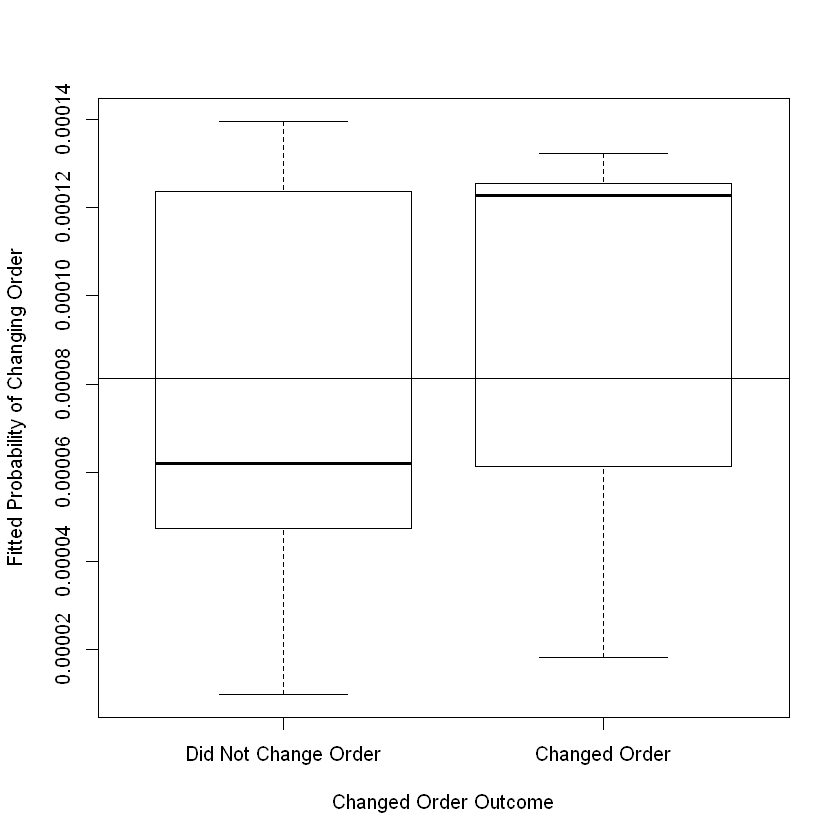

In [51]:
bp.changeorder <- boxplot(m.changeorder$fitted.values ~ changeorder, data = data.full,
                          xlab = "Changed Order Outcome", ylab = "Fitted Probability of Changing Order", names = c("Did Not Change Order", "Changed Order"))
abline(h = mean(data.full$changeorder))
bp.changeorder$stats

In [55]:
#Boxplot summaries
action <- c("EverSet", "EverIssued", "EverNetIssued", "EverSat", "Signed","Rescinded", "Sale", "ChangeOrder")

bp.df <- cbind(action, data.frame(rbind(bp.everset$stats[3,],
               bp.everissued$stats[3,],
               bp.evernetissued$stats[3,],
               bp.eversat$stats[3,],
               bp.signed$stats[3,],
               bp.rescinded$stats[3,],
               bp.sale$stats[3,],
               bp.changeorder$stats[3,])))
bp.df$means <- c(mean(data.full$everset),
                 mean(data.full$everissued),
                 mean(data.full$evernetissued),
                 mean(data.full$eversat),
                 mean(data.full$signed),
                 mean(data.full$rescinded),
                 mean(data.full$sale),
                 mean(data.full$changeorder))

bp.df
#write.table(bp.df, "clipboard", sep = "\t")

action,X1,X2,means
EverSet,2.559019e-01,0.2972532705,2.675066e-01
EverIssued,2.557838e-01,0.2970725774,2.668851e-01
EverNetIssued,1.819900e-01,0.2190520095,1.923056e-01
EverSat,1.815922e-01,0.2183684213,1.917211e-01
Signed,6.703291e-02,0.0774194979,7.027581e-02
Rescinded,1.340649e-02,0.0165979630,1.460455e-02
Sale,5.571324e-02,0.0626295328,5.567127e-02
ChangeOrder,6.199854e-05,0.0001227428,8.143042e-05


In [5]:
#Cross validation
dt <- sort(sample(nrow(data.full), nrow(data.full)*.7))
train <- data.full[dt,]
test <- data.full[-dt,]

m.test <- glm(sale ~ residential*Product.category, data = train, family=binomial)
predvals <- predict(m.test, newdata = test)

In [59]:
test.m.everset <- glm(everset ~ residential*Product.category, data = train, family=binomial)
predvals.everset <- predict(test.m.everset, newdata = test)
test.df.everset <- data.frame(obs = test$everset, pred = ifelse(exp(predvals.everset) > median(exp(predvals.everset)), 1, 0))
test.df.everset$correct <- ifelse(test.df.everset$obs == test.df.everset$pred, 1, 0)
correct.everset <- mean(test.df.everset$correct)

test.m.everissued <- glm(everissued ~ residential*Product.category, data = train, family=binomial)
predvals.everissued <- predict(test.m.everissued, newdata = test)
test.df.everissued <- data.frame(obs = test$everissued, pred = ifelse(exp(predvals.everissued) > median(exp(predvals.everissued)), 1, 0))
test.df.everissued$correct <- ifelse(test.df.everissued$obs == test.df.everissued$pred, 1, 0)
correct.everissued <- mean(test.df.everissued$correct)

test.m.evernetissued <- glm(evernetissued ~ residential*Product.category, data = train, family=binomial)
predvals.evernetissued <- predict(test.m.evernetissued, newdata = test)
test.df.evernetissued <- data.frame(obs = test$evernetissued, pred = ifelse(exp(predvals.evernetissued) > median(exp(predvals.evernetissued)), 1, 0))
test.df.evernetissued$correct <- ifelse(test.df.evernetissued$obs == test.df.evernetissued$pred, 1, 0)
correct.evernetissued <- mean(test.df.evernetissued$correct)

test.m.eversat <- glm(eversat ~ residential*Product.category, data = train, family=binomial)
predvals.eversat <- predict(test.m.eversat, newdata = test)
test.df.eversat <- data.frame(obs = test$eversat, pred = ifelse(exp(predvals.eversat) > median(exp(predvals.eversat)), 1, 0))
test.df.eversat$correct <- ifelse(test.df.eversat$obs == test.df.eversat$pred, 1, 0)
correct.eversat <- mean(test.df.eversat$correct)

test.m.signed <- glm(signed ~ residential*Product.category, data = train, family=binomial)
predvals.signed <- predict(test.m.signed, newdata = test)
test.df.signed <- data.frame(obs = test$signed, pred = ifelse(exp(predvals.signed) > median(exp(predvals.signed)), 1, 0))
test.df.signed$correct <- ifelse(test.df.signed$obs == test.df.signed$pred, 1, 0)
correct.signed <- mean(test.df.signed$correct)

test.m.rescinded <- glm(rescinded ~ residential*Product.category, data = train, family=binomial)
predvals.rescinded <- predict(test.m.rescinded, newdata = test)
test.df.rescinded <- data.frame(obs = test$rescinded, pred = ifelse(exp(predvals.rescinded) > median(exp(predvals.rescinded)), 1, 0))
test.df.rescinded$correct <- ifelse(test.df.rescinded$obs == test.df.rescinded$pred, 1, 0)
correct.rescinded <- mean(test.df.rescinded$correct)

test.m.sale <- glm(sale ~ residential*Product.category, data = train, family=binomial)
predvals.sale <- predict(test.m.sale, newdata = test)
test.df.sale <- data.frame(obs = test$sale, pred = ifelse(exp(predvals.sale) > median(exp(predvals.sale)), 1, 0))
test.df.sale$correct <- ifelse(test.df.sale$obs == test.df.sale$pred, 1, 0)
correct.sale <- mean(test.df.sale$correct)

test.m.changeorder <- glm(changeorder ~ residential*Product.category, data = train, family=binomial)
predvals.changeorder <- predict(test.m.changeorder, newdata = test)
test.df.changeorder <- data.frame(obs = test$changeorder, pred = ifelse(exp(predvals.changeorder) > median(exp(predvals.changeorder)), 1, 0))
test.df.changeorder$correct <- ifelse(test.df.changeorder$obs == test.df.changeorder$pred, 1, 0)
correct.changeorder <- mean(test.df.changeorder$correct)

In [33]:
correct.vec <- c(correct.everset*100,
                 correct.everissued*100,
                 correct.evernetissued*100,
                 correct.eversat*100,
                 correct.signed*100,
                 correct.rescinded*100,
                 correct.sale*100,
                 correct.changeorder*100)

correct.df <- cbind(action, correct.vec)
correct.df
#write.table(correct.df, "clipboard", sep = "\t")

action,correct.vec
EverSet,56.3193760621767
EverIssued,56.2868039020242
EverNetIssued,54.8914789117882
EverSat,54.8652402272209
Signed,51.655223684786
Rescinded,50.8626344544088
Sale,51.6033495038024
ChangeOrder,50.2602002886255
